In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [90]:
df=pd.DataFrame(columns=['exp','degree','pay'])

In [91]:
for i in range(25):
    Exp = random.randint(5,10)
    Degree = random.choice(["High_school","Bachelor's","Master's","PhD"])
    Pay = random.randint(50000,100000)
    df.loc[len(df.index)] = [Exp,Degree,Pay] 

df.head()
# Creating the dataset for the model

,exp,degree,pay
0,8,PhD,79296
1,8,Master's,53473
2,10,Master's,53086
3,6,Master's,83612
4,9,High_school,94998


In [92]:
df
# Created the dataset

,exp,degree,pay
0,8,PhD,79296
1,8,Master's,53473
2,10,Master's,53086
3,6,Master's,83612
4,9,High_school,94998
5,7,Master's,66881
6,10,High_school,55870
7,6,High_school,67417
8,8,Master's,89176
9,10,High_school,65925


In [93]:
df.to_csv("practice_Decision.csv")
#Converted it into csv file

In [94]:
df = pd.read_csv("practice_Decision.csv") #Read the file

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25 non-null     int64 
 1   exp         25 non-null     int64 
 2   degree      25 non-null     object
 3   pay         25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes


In [97]:
df= df.drop('Unnamed: 0',axis=1) #Drop the unnamed: 0 column because the column is not used for analysis.

In [98]:
df

,exp,degree,pay
0,8,PhD,79296
1,8,Master's,53473
2,10,Master's,53086
3,6,Master's,83612
4,9,High_school,94998
5,7,Master's,66881
6,10,High_school,55870
7,6,High_school,67417
8,8,Master's,89176
9,10,High_school,65925


<AxesSubplot:xlabel='pay'>

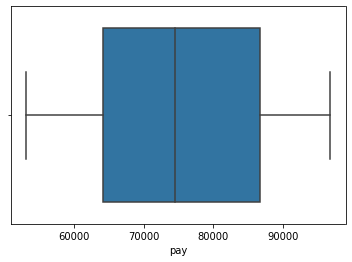

In [122]:
sns.boxplot(x=df.pay)

In [123]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

In [124]:
#Drop the target column for furthur analysis.
x=df.drop('pay',axis=1)
y=df.pay
x

,exp,degree
0,8,PhD
1,8,Master's
2,10,Master's
3,6,Master's
4,9,High_school
5,7,Master's
6,10,High_school
7,6,High_school
8,8,Master's
9,10,High_school


In [103]:
df_num = x.select_dtypes('number')
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled
# Scaling the numerical column to decrease the difference in the column.

array([[0.6],
       [0.6],
       [1. ],
       [0.2],
       [0.8],
       [0.4],
       [1. ],
       [0.2],
       [0.6],
       [1. ],
       [0.6],
       [0.8],
       [0.2],
       [0. ],
       [0.4],
       [0.4],
       [0.6],
       [0.2],
       [0.6],
       [0.4],
       [0.2],
       [0.8],
       [0.6],
       [0.8],
       [0.2]])

In [104]:
x_num_scaled = pd.DataFrame(df_num_scaled,columns=df_num.columns,index=df_num.index)

In [105]:
x_num_scaled.describe()

,exp
count,25.000000
mean,0.528000
std,0.287981
min,0.000000
25%,0.200000
50%,0.600000
75%,0.800000
max,1.000000


In [106]:
x_cat = x.select_dtypes('object')
x_cat_scaled = label_encoder.fit_transform(x_cat)
x_cat_encoded=pd.DataFrame(x_cat_scaled,columns=x_cat.columns,index=x_cat.index)
#The category column is encoded.

C:\Users\moazi\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
X = pd.concat([df_num, x_cat_encoded], axis=1)
X
#Concate the categorical and Numerical column for futhur analysis.

,exp,degree
0,8,3
1,8,2
2,10,2
3,6,2
4,9,1
5,7,2
6,10,1
7,6,1
8,8,2
9,10,1


In [108]:
 X.shape, x_num_scaled.shape, x_cat_encoded.shape

((25, 2), (25, 1), (25, 1))

In [109]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)
#Print the sum of null values and  of train and test data.

exp       0
degree    0
dtype: int64
0
(25, 2)
(25,)


In [110]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Divide the test data and train data.

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(20, 2)
(5, 2)
(20,)
(5,)


In [112]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
#Importing the model and their required modules.

In [125]:
# Imported the decision tree and it gives the predicted values for the 
decision_tree = DecisionTreeRegressor(random_state=0, criterion='absolute_error',max_depth=2)

In [126]:
model = decision_tree.fit(X_train,y_train)

In [127]:
export_graphviz(model, out_file ='tree.dot',feature_names =['Exp', 'Degree'])

[Text(0.5, 0.8333333333333334, 'Exp <= 9.5\nabsolute_error = 13301.55\nsamples = 20\nvalue = 70640.5'),
 Text(0.25, 0.5, 'Exp <= 5.5\nabsolute_error = 12819.941\nsamples = 17\nvalue = 75245.0'),
 Text(0.125, 0.16666666666666666, 'absolute_error = 0.0\nsamples = 1\nvalue = 86774.0'),
 Text(0.375, 0.16666666666666666, 'absolute_error = 12900.625\nsamples = 16\nvalue = 74554.5'),
 Text(0.75, 0.5, 'Degree <= 1.5\nabsolute_error = 4279.667\nsamples = 3\nvalue = 55870.0'),
 Text(0.625, 0.16666666666666666, 'absolute_error = 5027.5\nsamples = 2\nvalue = 60897.5'),
 Text(0.875, 0.16666666666666666, 'absolute_error = 0.0\nsamples = 1\nvalue = 53086.0')]

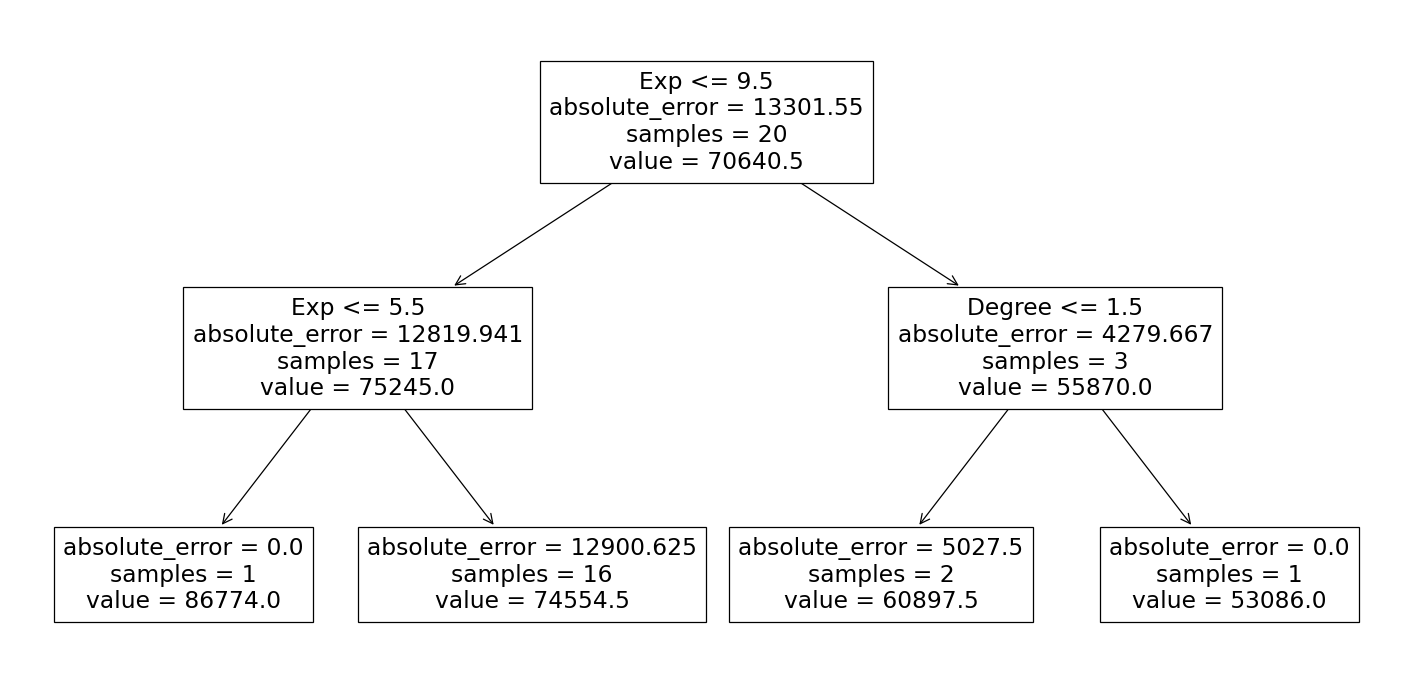

In [128]:
feature_names =['Exp', 'Degree']
plt.figure(figsize=(20,10), dpi=90)
plot_tree(model, feature_names=feature_names)

In [117]:
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,exp,0.943832
1,degree,0.056168


In [118]:
from sklearn.metrics import mean_squared_error as mse

mse_per_feature = {}

for i in X_test.columns:
    decision_tree.fit(X_train[[i]], y_train)
    y_pred = decision_tree.predict(X_test[[i]])
    mse_value = mse(y_test, y_pred)  
    mse_per_feature[i] = np.square(mse_value)

for feature, mse_value in mse_per_feature.items():
    print(f"{feature}: {mse_value}")

exp: 4246375288002259.0
degree: 1.767720958684839e+16
